<a href="https://colab.research.google.com/github/sherbw28/class_deep/blob/main/Selenium%E3%81%A7%E7%94%BB%E5%83%8F%E5%8F%8E%E9%9B%862022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium==4.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (107.0.5304.87-0ubuntu11.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [ ]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import os
import time
import datetime
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

In [ ]:
tb_start = time.time()
dt_now = datetime.datetime.now()
dt_date_str = dt_now.strftime('%Y/%m/%d %H:%M')
print(dt_date_str)

2022/12/06 01:28


In [ ]:
query = '犬 フリー'
limit_dl_num = 100
save_dir = 'img/dog_'
file_name = 'dog_'
timeout = 60
access_wait = 1
retry_num = 3
driver_path = '/usr/bin/chromedriver'

In [ ]:
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('start-fullscreen')
options.add_argument('--disable-pugins')
options.add_argument('--disable-estensions')
driver = webdriver.Chrome(driver_path, options=options)
driver.implicitly_wait(timeout)
tm_driver = time.time()
print('WebDriver起動完了')

<ipython-input-72-63109b82f5b8>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path, options=options)


WebDriver起動完了


In [ ]:
url = f'https://www.google.com/search?q={query}&tbm=isch'
driver.get(url)
tm_geurl = time.time()

In [ ]:
tmb_elems = driver.find_elements_by_css_selector('#islmp img')
tmb_alts = [tmb.get_attribute('alt') for tmb in tmb_elems]
count = len(tmb_alts) - tmb_alts.count("")
print(count)

<ipython-input-74-df575386219a>:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  tmb_elems = driver.find_elements_by_css_selector('#islmp img')


48


In [ ]:
while count < limit_dl_num:
  driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
  time.sleep(1)
  tmb_elems = driver.find_elements_by_css_selector('#islmp img')
  tmb_alts = [tmb.get_attribute('alt') for tmb in tmb_elems]
  count  = len(tmb_alts) - tmb_alts.count('')
  print(count)

<ipython-input-75-de729be2d9c2>:4: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  tmb_elems = driver.find_elements_by_css_selector('#islmp img')


100


In [ ]:
imgframe_elem = driver.find_element_by_id(('islsp'))

<ipython-input-76-bccfe8b3b005>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  imgframe_elem = driver.find_element_by_id(('islsp'))


In [ ]:
os.makedirs(save_dir,exist_ok=True)
http_headers = {'User-Aget':driver.execute_script('return navigator.userAgent;')}
print(http_headers)
img_exts = ('.jpg','.jpeg','.png','gif')

{'User-Aget': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/107.0.5304.87 Safari/537.36'}


In [ ]:
def get_extension(url):
  url_lower = url.lower()
  for img_ext in img_exts:
    if img_ext in url_lower:
      extension = '.jpg' if img_ext == '.jpeg' else img_ext
      break
    else:
      extension = ''
  return extension


In [ ]:
def download_image(url,path, loop):
  result = False
  for i in range(loop):
    try:
      r = requests.get(url,headers=http_headers,stream=True,timeout=10)
      r.raise_for_status()
      with open(path,'wb') as f:
        f.write(r.content)
    except requests.exceptions.SSLError:
      print("***** SSLエラー *****")
      break
    except requests.exceptions.RequestException as e:
      print(f'***** requesrtsエラー({e}):{i + 1}/{retry_num}')
      time.sleep(1)
    else:
      result = True
      break

In [ ]:
tm_thumbnails = time.time()
print("サムネイル画像取得とDL準備完了")

サムネイル画像取得とDL準備完了


0:犬の写真素材｜写真素材なら「写真AC」無料（フリー）ダウンロードOK


/usr/local/lib/python3.8/dist-packages/selenium/webdriver/remote/webelement.py:484: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


***** img要素検索エラー
***** キャンセル
0:犬 | フリー素材ドットコム
1:犬 | フリー素材ドットコム
***** urlに拡張子が含まれていないのでキャンセル

1:へっくしょん（犬）の写真素材 - ぱくたそ
2:犬の写真素材｜写真素材なら「写真AC」無料（フリー）ダウンロードOK
3:犬 のストック写真、ロイヤリティフリーの画像、ベクター、およびビデオ | Adobe Stock
4:犬の写真素材｜写真素材なら「写真AC」無料（フリー）ダウンロードOK
5:フリー写真] 芝生を駆ける二匹の子犬でアハ体験 - GAHAG | 著作権フリー写真・イラスト素材集
***** requesrtsエラー(403 Client Error: Forbidden for url: https://img01.gahag.net/201601/14o/gahag-0046037255.jpg):1/3
***** requesrtsエラー(403 Client Error: Forbidden for url: https://img01.gahag.net/201601/14o/gahag-0046037255.jpg):2/3
***** requesrtsエラー(403 Client Error: Forbidden for url: https://img01.gahag.net/201601/14o/gahag-0046037255.jpg):3/3
6:犬（戌）」をテーマにした無料写真素材10選（商用利用可） | ACワークスのブログ
7:無料で使える 犬 フリー素材 - 使える写真ギャラリーSothei
8:怠惰な秋田犬の写真素材 - ぱくたそ
9:画像素材なら！無料・フリー写真素材のフリーフォト
***** urlチェック:1/3
***** urlチェック:2/3
***** urlチェック:3/3
***** urlに拡張子が含まれていないのでキャンセル

9:犬 | フリー素材ドットコム
10:犬の写真素材｜写真素材なら「写真AC」無料（フリー）ダウンロードOK
11:フリー写真素材|動物|哺乳類|イヌ科|犬・イヌ|子犬・小犬|柴犬 ... | Dog blog, Shiba inu, Cute animals
12:フリー写真] 耳
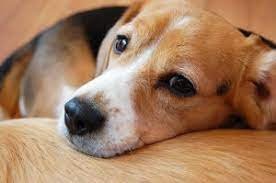
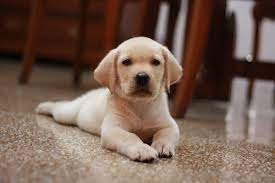
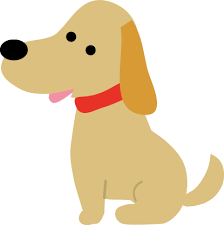
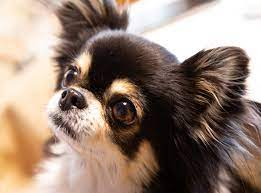

In [ ]:
EXCLUSION_URL = 'https//lh3.googleusercontent.com/' # 除外対象URL
count = 0
url_list = [ ]

# サムネイルをクリック、画像リンクを取得、画像をDL＆保存を繰り返す
# zipで組み合わせの順番を固定化
for tmb_elem, tmb_alt in zip(tmb_elems, tmb_alts): 
  if tmb_alt == '': # ALT属性が空=小さいサムネイルとみなしてスキップ
    continue  
  print(  f'{count}:{tmb_alt}'  ) # カウンタとALT属性を表示
  # リトライ回数分だけ試行
  for i in range(retry_num):
    # サムネイルをクリック
    try:
      tmb_elem.click( )
    except ElementClickInterceptedException:
      print(f'***** click エラー: {i+1}/{retry_num}')
      # フォーカスをあわせる
      driver.execute_script('arguments[0].scrollIntoView(true);', tmb_elem)
      time.sleep(1)
    else:
      break # try成功（クリック成功）
  # forの終わり
  else: 
    print('***** キャンセル')
    continue # リトライ失敗、次のアイコンにスキップ
  # クリック成功したら、処理を続ける（画像のオブジェクトを取得する処理）
  time.sleep(access_wait)
  # alt属性の加工
  alt = tmb_alt.replace("'","\\")
  try:
    # 左側のalt属性を基に左側の大きな画像をalt属性を指定して取得
    img_elem = imgframe_elem.find_element_by_css_selector(f'img[alt=\'{alt}\']')
  except NoSuchElementException:  # 右側に対応する要素が見つからない
    print('***** img要素検索エラー')
    print('***** キャンセル')
    continue # 次のサムネイルへスキップ
  # 右の大きな画像オブジェクトが取得できたら、その画像リンクを取得する

  tmb_url = tmb_elem.get_attribute('src')  # サムネイルsrc属性からリンクurlを取得
  # リトライしながらURLをチェック
  for i in range(retry_num):
    # 大きい画像のURL
    url = img_elem.get_attribute('src')
    if EXCLUSION_URL in url:
      print('除外対象url')
      url=''
      break # ループ中断
    elif url == tmb_url: # サムネイルのurlと一緒なら、リトライを続ける
      print(f'***** urlチェック:{i+1}/{retry_num}')
    else:
      break # ループ中断（除外対象でもサムネイルでもない、OKなurl）
    # RETRYループ終わり
  # urlチェックの結果、OKなリンクでなければ次のサムネイルへスキップ
  if url == '':
    print('***** キャンセル') # 大きなループをcontinue
    continue
  # url先の拡張子が指定の画像拡張子でなければ次のサムネイルへスキップ
  ext = get_extension( url ) # 自作の関数で拡張子を取得
  if ext == '': # 指定の画像拡張子でない場合
    print(f'***** urlに拡張子が含まれていないのでキャンセル')
    print(f'{url}')
    continue
  
  # ダウンロード周り:保存するファイルパスを指定する
  filename = f'{file_name}{count}{ext}'
  path = save_dir + '/' + filename
  # ダウンロードを実行（自作関数を呼び出す）
  result = download_image( url, path, retry_num )
  if result == False:
    print('***** キャンセル')
    continue # 次のサムネイルへスキップ
  # ダウンロードしたurlをリストに追加
  url_list.append(f'{filename}:{url}')

  # 最後に、ダウンロード数カウンタの更新と終了判定
  count += 1
  if count >= limit_dl_num:
    break # ダウンロードのループを終了
# ループの終了
# 所領時間の表示
tm_end = time.time( ) # 現在時刻
print('ダウンロード', f'{tm_end - tm_thumbnails:.1f}s')
print('-------------------------')

In [ ]:
# ここまでのトータル所要時間を出力する
total = tm_end - tm_start
total_str = f'トータル時間:{total:.1f}s({total/60:.2f}min)'
count_str = f'ダウンロード数:{count}'
print(total_str)
print(count_str)


NameError: ignored